In [ ]:
# Import librabry
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_column', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleansing

### Read dataset and solve datatype dataset

In [ ]:
# Import and read dataset
df = pd.read_csv('/content/drive/MyDrive/transactions.csv')
df.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [ ]:
#Check missing value
df.isnull().sum()

Unnamed: 0                       0
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd    

In [ ]:
# Drop column where missing value in column 100%
df.drop(columns=['Unnamed: 0','echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],inplace=True)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
# Check data types
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object

In [ ]:
# Check missing value again
df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

In [ ]:
#Check shape dataset
df.shape

(641914, 23)

In [ ]:
#Convert Data to Object
df = df.astype({"accountNumber":'object', "customerId":'object',"posEntryMode":'object',"posConditionCode":'object',"cardCVV":'object',"enteredCVV":'object',"cardLast4Digits":'object'})
df.dtypes

accountNumber                object
customerId                   object
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object

In [ ]:
#converting in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df.dtypes

accountNumber                       object
customerId                          object
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
isFraud                               bool
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
dtype: obje

Handling Outlier tidak dilakukan, karena akan berpengaruh dalam data yang berlabel Fraud

---

In [ ]:
#Unique Value
#When an attribute has less number of Unique Values it is always a good criteria to look at them keenly to know more about the structure as a whole and how the other attributes are behaving around these small buckets.
for col in df.columns:
    if(df[col].nunique() <= 5):
        print(df[col].value_counts())

US     632303
MEX      2626
CAN      1870
PR       1202
Name: acqCountry, dtype: int64
US     635577
MEX      2636
CAN      1874
PR       1203
Name: merchantCountryCode, dtype: int64
5.0     255615
9.0     193193
2.0     160589
90.0     16251
80.0     12921
Name: posEntryMode, dtype: int64
1.0     514144
8.0     121507
99.0      5976
Name: posConditionCode, dtype: int64
PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64
False    630612
True      11302
Name: isFraud, dtype: int64
False    340453
True     301461
Name: cardPresent, dtype: int64
False    640945
True        969
Name: expirationDateKeyInMatch, dtype: int64


### Handling Missing Value

In [ ]:
#Handling Missing Value
df['acqCountry'] = df['acqCountry'].fillna('US')
df['merchantCountryCode'] = df['merchantCountryCode'].fillna('US')
df.dropna(subset=["posEntryMode"], axis=0, inplace=True)
df.dropna(subset=["posConditionCode"], axis=0, inplace=True)

In [ ]:
# Check mean from transaction type by transaction amount
df.groupby('transactionType').mean()['transactionAmount']

transactionType
ADDRESS_VERIFICATION      0.000000
PURCHASE                138.730479
REVERSAL                138.751706
Name: transactionAmount, dtype: float64

In [ ]:
# Check median from transaction type by transaction amount
df.groupby('transactionType').median()['transactionAmount']

transactionType
ADDRESS_VERIFICATION     0.00
PURCHASE                89.62
REVERSAL                91.25
Name: transactionAmount, dtype: float64

In [ ]:
# Check row where missing value in transaction type and transaction equal 0
df[(df['transactionAmount'] == 0)&(df['transactionType'].isnull() == True)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


Tidak ditemukan data dengan jumlah transaksi 0 ketika missing value pada kolom tipe transaksi

---

In [ ]:
#Fill with modus
df['transactionType'] = df['transactionType'].fillna('PURCHASE')

In [ ]:
# check the missing values again to make sure the missing values are resolved
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

Find Duplicate Data

In [ ]:
#find transactions of same amount within the same account from the same merchant by transactionType and transactionDateTime
duplicated = df[df.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName','transactionType','transactionDateTime'], keep=False)]
duplicated

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


Duplicate data not found

### Summary of dataset by data types

In [ ]:
#Summary by numerik type
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,638285.000000,638285.000000,638285.000000,638285.000000
mean,10697.229294,6651.964333,135.176189,4045.264961
std,11460.791551,9226.588766,147.058492,5947.629920
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1115.330000,32.320000,502.760000
50%,7500.000000,3577.570000,85.820000,2152.150000
75%,15000.000000,8163.550000,189.050000,5006.710000
max,50000.000000,50000.000000,1825.250000,47496.500000


In [ ]:
#Summary by object type
df.describe(include='object')

,accountNumber,customerId,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType
count,638285,638285,638285,638285,638285,638285.0,638285.0,638285,638285,638285,638285,638285
unique,5000,5000,2492,4,4,5.0,3.0,19,899,980,5134,3
top,318001076,318001076,Lyft,US,US,5.0,1.0,online_retail,633,633,1789,PURCHASE
freq,9988,9988,25159,632623,632609,255509.0,511470.0,160637,11304,11204,9988,605820


In [ ]:
#Summary by datetime type
df.describe(include='datetime')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
count,638285,638285,638285,638285
unique,631920,165,1826,2186
top,2016-10-16 12:53:14,2020-08-01 00:00:00,2015-12-11 00:00:00,2016-07-20 00:00:00
freq,3,4171,10090,3925
first,2016-01-01 00:00:37,2018-05-01 00:00:00,1985-12-25 00:00:00,1985-12-25 00:00:00
last,2016-12-30 23:59:27,2032-01-01 00:00:00,2015-12-31 00:00:00,2016-12-30 00:00:00


In [ ]:
#Summary by boolean type
df.describe(include='boolean')

,isFraud,cardPresent,expirationDateKeyInMatch
count,638285,638285,638285
unique,2,2,2
top,False,False,False
freq,627252,338522,637322


# Exploratory Data Analysis

False    627252
True      11033
Name: isFraud, dtype: int64
False    0.982715
True     0.017285
Name: isFraud, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


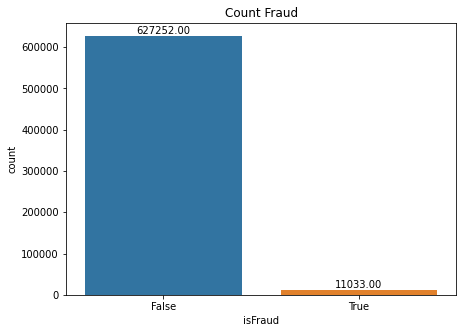

In [ ]:
# Check many transactions are labeled fraud
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts()/len(df))

plt.figure(figsize = (7,5))
graph = sns.countplot(df.isFraud)
graph.set_xticklabels(graph.get_xticklabels())
graph.set_title("Count Fraud")

for bar in graph.patches:
  graph.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

In [ ]:
# Check top merchants name transaction
df['merchantName'].value_counts().head()

Lyft          25159
Uber          25107
gap.com       13760
apple.com     13538
target.com    13528
Name: merchantName, dtype: int64

In [ ]:
# Check average amount of transactions on Fraudulent Transactions and transactions on Legitimate Transactions?
df.groupby('isFraud').mean()[['transactionAmount']]

,transactionAmount
isFraud,
False,133.465217
True,232.448969


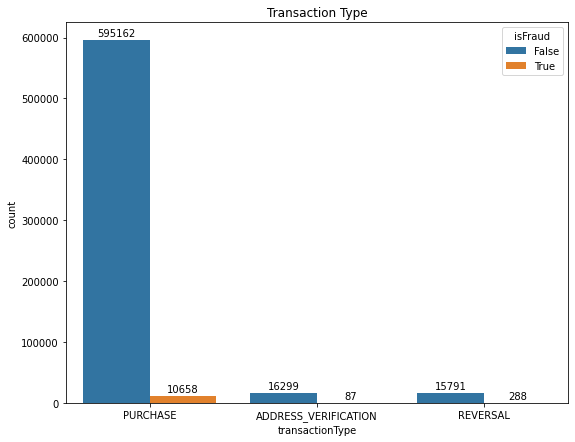

In [ ]:
# Check distribution fraud by transaction type
plt.figure(figsize = (9,7))
graph = sns.countplot(data=df, x='transactionType', hue='isFraud')
graph.set_title("Transaction Type")

for bar in graph.patches:
  graph.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')

In [ ]:
# Check the earliest account open date regarding the dataset?
print(df.sort_values('accountOpenDate').head(1)[['accountNumber','customerId','accountOpenDate','transactionDateTime','isFraud']])

# Check the most recent account open date regarding the dataset?
print(df.sort_values('accountOpenDate',ascending=False,).head(1)[['accountNumber','customerId','accountOpenDate','transactionDateTime','isFraud']])

       accountNumber customerId accountOpenDate transactionDateTime  isFraud
305732     789836144  789836144      1985-12-25 2016-08-05 02:43:22    False
       accountNumber customerId accountOpenDate transactionDateTime  isFraud
452252     890796581  890796581      2015-12-31 2016-07-15 22:13:38    False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

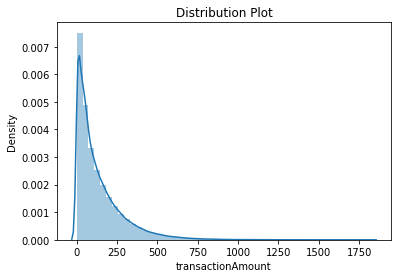

In [ ]:
# Check distribution transaction amount
sns.distplot(df.transactionAmount).set_title("Distribution Plot")

Text(0.5, 1.0, 'Boxplot Transaction Amount')

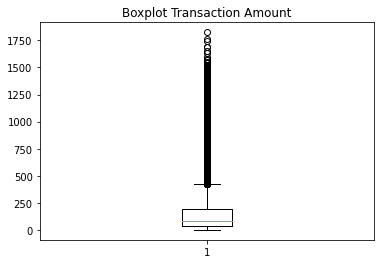

In [ ]:
# check boxplot from transaction amount
plt.boxplot(df['transactionAmount'])
plt.title("Boxplot Transaction Amount")

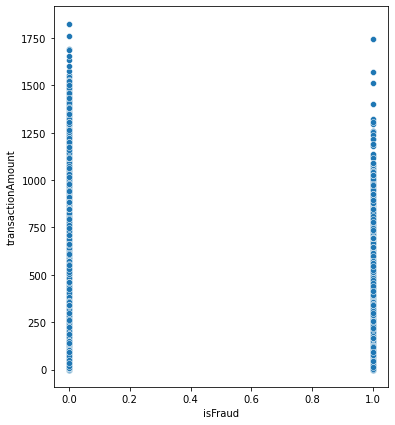

In [ ]:
# Check scatter plot from isfraud with transaction amount
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='isFraud', y='transactionAmount')

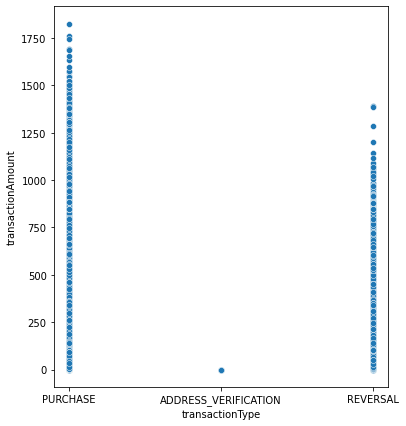

In [ ]:
# Check scatter plot from transaction type with transaction amount
plt.figure(figsize=(6,7))
sns.scatterplot(data=df, x='transactionType', y='transactionAmount')

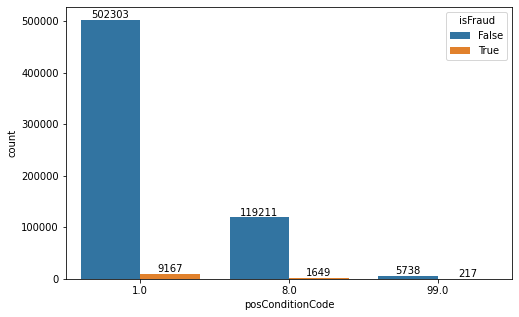

In [ ]:
# Check distribution fraud by pos condition code
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df, x='posConditionCode', hue = 'isFraud')
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

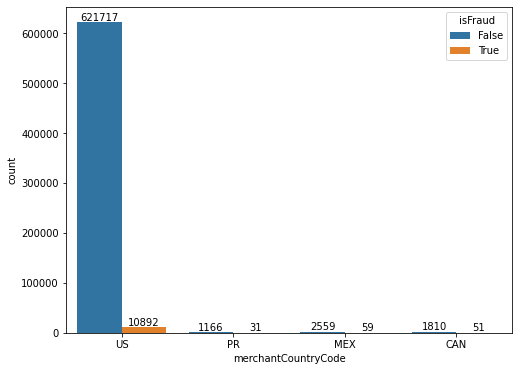

In [ ]:
# Check distribution fraud by merchant country code
plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x='merchantCountryCode', hue = 'isFraud')
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

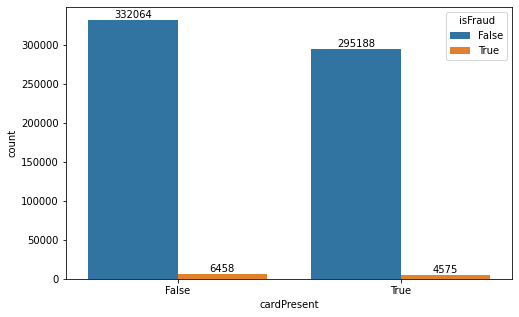

In [ ]:
# Check distribution fraud by card present
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df, x='cardPresent', hue = 'isFraud')
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

# Data Pre-processing

In [ ]:
#drop irrelevant column
df = df.drop(["accountNumber", "customerId", "transactionDateTime", "merchantName",
              "currentExpDate", "accountOpenDate", "dateOfLastAddressChange", "cardCVV",
              "enteredCVV", "cardLast4Digits"], axis=1)
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,PURCHASE,True,0.00,False,False
1,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,PURCHASE,False,111.33,False,False
2,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,PURCHASE,False,136.08,False,False
3,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,PURCHASE,True,323.48,False,False
4,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
#Converting boolean values to binary
for col in df.columns:
    if(df[col].astype(str).str.contains('True').sum()>0 and df[col].astype(str).str.contains('False').sum()>0):
        df.loc[df[col].astype(str).str.contains('True'), col] = 1
        df.loc[df[col].astype(str).str.contains('False'), col] = 0

In [ ]:
#Converting distinct values using label encoding
from sklearn.preprocessing import LabelEncoder
obj_col = []
for col in df.columns:
    if(df[col].dtype == object):
        obj_col.append(col)

labelencoder = LabelEncoder()
for i in obj_col:
    df[i] = labelencoder.fit_transform(df[i].astype(str))

In [ ]:
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,111.33,3,3,1,0,17,1,1,0.00,0,0
1,5000,4888.67,24.75,3,3,3,0,17,1,0,111.33,0,0
2,5000,4863.92,187.40,3,3,1,0,17,1,0,136.08,0,0
3,5000,4676.52,227.34,3,3,0,0,17,1,1,323.48,0,0
4,5000,4449.18,0.00,3,3,0,0,17,0,0,550.82,0,0


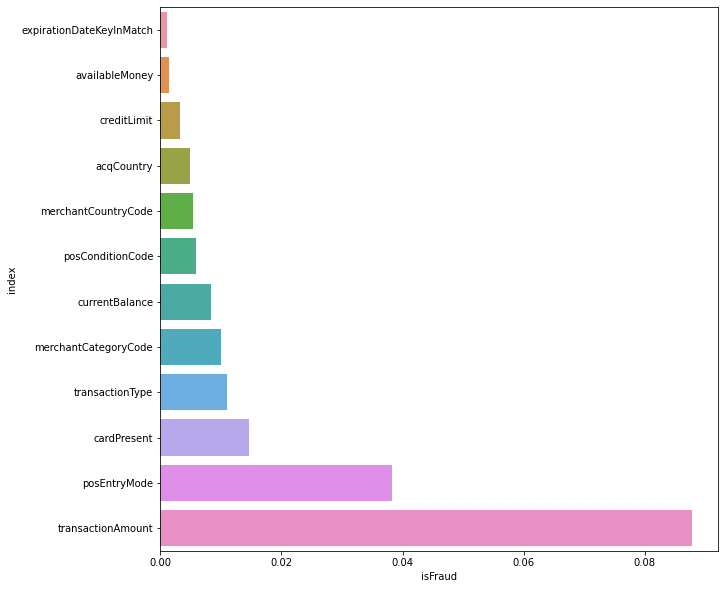

In [ ]:
# Chart correlation isFraud with other variabel
dataC = abs(df.corr())['isFraud'].sort_values().reset_index()
dataC = dataC[~dataC['index'].str.contains('isFraud')]

plt.figure(figsize=(10,10))
sns.barplot(data = dataC.reset_index(), y='index', x = 'isFraud')

In [ ]:
print("Correlation Values")

corr = abs(df.corr()).drop('isFraud')
corr.sort_values(['isFraud'], ascending = False, inplace = True)
print(corr.isFraud)

Correlation Values
transactionAmount           0.087726
posEntryMode                0.038323
cardPresent                 0.014609
transactionType             0.010996
merchantCategoryCode        0.010092
currentBalance              0.008464
posConditionCode            0.005950
merchantCountryCode         0.005394
acqCountry                  0.004972
creditLimit                 0.003248
availableMoney              0.001422
expirationDateKeyInMatch    0.001129
Name: isFraud, dtype: float64


In [ ]:
#Segrigating Features and Target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']
feature = pd.DataFrame({'feature' : X.columns})

In [ ]:
# Split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(510628, 12) (510628,)
(127657, 12) (127657,)


In [ ]:
# Randomly under sample the majority class
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train).items()))

[(0, 8818), (1, 8818)]


# DATA MODELLING

### Logistic Regression

In [ ]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

# define models
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Obtain model predictions
y1_pred = model1.predict(X_test)
y1_pred_train = model1.predict(X_train)

In [ ]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:\n', classification_report(y_test, y1_pred))
conf_mat = confusion_matrix(y_test, y1_pred)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77    125442
           1       0.03      0.60      0.05      2215

    accuracy                           0.63    127657
   macro avg       0.51      0.61      0.41    127657
weighted avg       0.97      0.63      0.76    127657

Confusion matrix:
 [[79143 46299]
 [  893  1322]]


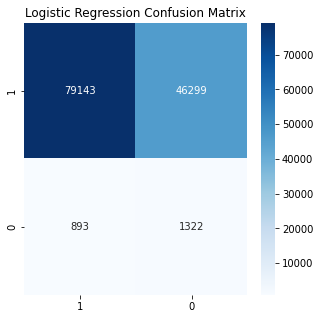

In [ ]:
cm = confusion_matrix(y_test, model1.predict(X_test))
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])
plt.figure(figsize = (5,5))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm, cmap='Blues', annot = True, fmt='',xticklabels = ["1", "0"], yticklabels = ["1", "0"])

0.6565326513349472


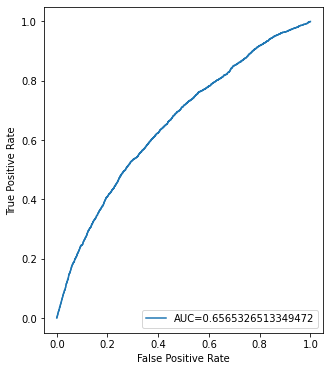

In [ ]:
#define metrics
from sklearn.metrics import roc_auc_score, roc_curve
y1_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y1_pred_proba)
aucLR = roc_auc_score(y_test, y1_pred_proba)
print(aucLR)

#create ROC curve
plt.figure(figsize = (5,6))
plt.plot(fpr,tpr,label="AUC="+str(aucLR))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

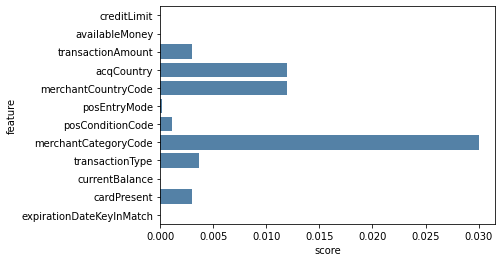

In [ ]:
importance_lg = abs(model1.coef_[0])
feature['score'] = importance_lg
feature
# plot feature importance
sns.barplot(data = feature, y = 'feature', x = 'score', color='steelblue')

Dengan menggunakan model Logistic Regression, feature yang paling berpengaruh
terhadap isFraud adalah merchantCategoryCode


---

### Random Forest

In [ ]:
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyper Parameter Tuning
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv)
    random.fit(X_train,y_train)
    best_param = random.best_params_
    return best_param
param = {
    'max_features': ['log2', 'sqrt','auto'],
    'criterion':['entropy','gini'],
    'max_depth': [2, 5, 10, 15, 30, None],
    "min_samples_split":[5,8,10,20,30],
    "min_samples_leaf":[3,5,10,15,20]
}
param_best = tuning(RandomForestClassifier(),param,5)

# Fit the model to our training set
rf_model = RandomForestClassifier(**param_best)
rf_model.fit(X_train,y_train)

In [ ]:
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Fit the model to our training set
rf_model = RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=8)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=8)

In [ ]:
# Obtain predictions from the test data
y2_pred = rf_model.predict(X_test)

In [ ]:
# Print the ROC curve, classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y2_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y2_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80    125442
           1       0.04      0.69      0.07      2215

    accuracy                           0.67    127657
   macro avg       0.51      0.68      0.44    127657
weighted avg       0.98      0.67      0.79    127657


Confusion Matrix:
[[84556 40886]
 [  678  1537]]


Text(24.0, 0.5, 'Actual')

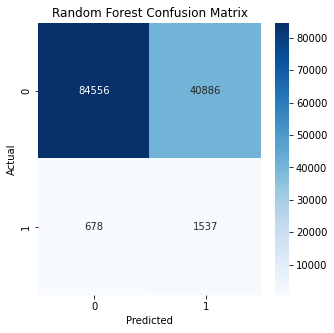

In [ ]:
cm = confusion_matrix(y_test, rf_model.predict(X_test))
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])
plt.figure(figsize = (5,5))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm, cmap='Blues', annot = True, fmt='',xticklabels = ["0", "1"], yticklabels = ["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')

0.7465162967044243


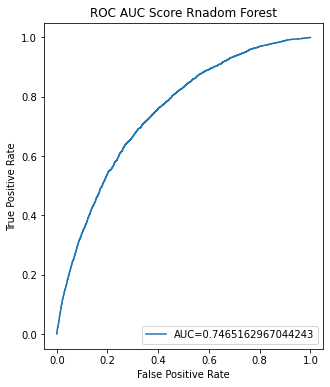

In [ ]:
#define metrics
y2_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y2_pred_proba)
aucRF = roc_auc_score(y_test, y2_pred_proba)
print(aucRF)

#create ROC curve
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,label="AUC="+str(aucRF))
plt.title('ROC AUC Score Rnadom Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
importances_rf = rf_model.feature_importances_

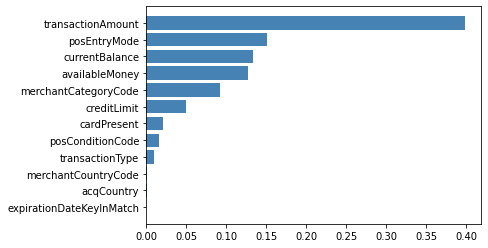

In [ ]:
indices_rf = np.argsort(importances_rf)

fig, ax = plt.subplots()
ax.barh(range(len(importances_rf)), importances_rf[indices_rf], color='steelblue')
ax.set_yticks(range(len(importances_rf)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_rf])

Dengan menggunakan model Random Forest, feature yang paling berpengaruh terhadap isFraud adalah transactionAmount

---

### Decision Tree

In [ ]:
# Define the model as the Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv)
    random.fit(X_train,y_train)
    best_param = random.best_params_
    return best_param
param = {
    'max_features': ['log2', 'sqrt','auto'],
    'criterion':['entropy','gini'],
    'max_depth': [5, 8, 10, 15, 30, None],
    "min_samples_split":[5,10,15,30],
    "min_samples_leaf":[5,8,10,15,30]
}
param_best = tuning(DecisionTreeClassifier(),param,5)

# Fit the model to our training set
dct_tune = DecisionTreeClassifier(**param_best)
dct_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=15, min_samples_split=5)

In [ ]:
# Obtain model predictions
y3_pred = dct_tune.predict(X_test)

# Print the ROC curve, classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y3_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y3_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    125442
           1       0.03      0.62      0.07      2215

    accuracy                           0.69    127657
   macro avg       0.51      0.66      0.44    127657
weighted avg       0.97      0.69      0.80    127657


Confusion Matrix:
[[86726 38716]
 [  831  1384]]


Text(24.0, 0.5, 'Actual')

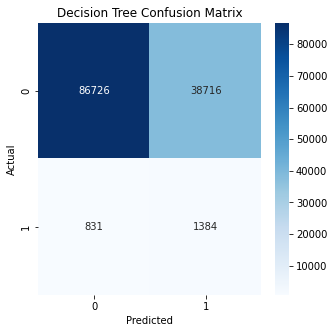

In [ ]:
cm = confusion_matrix(y_test, dct_tune.predict(X_test))
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])
plt.figure(figsize = (5,5))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm, cmap='Blues', annot = True, fmt='',xticklabels = ["0", "1"], yticklabels = ["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')

0.7063397370914504


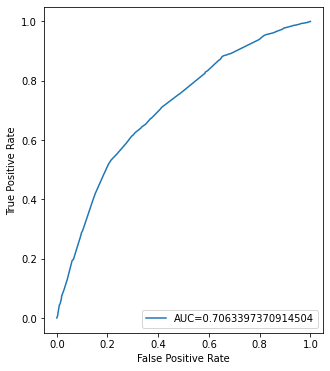

In [ ]:
#define metrics
y3_pred_proba = dct_tune.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y3_pred_proba)
aucDT = roc_auc_score(y_test, y3_pred_proba)
print(aucDT)

#create ROC curve
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,label="AUC="+str(aucDT))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
importances_dt = dct_tune.feature_importances_

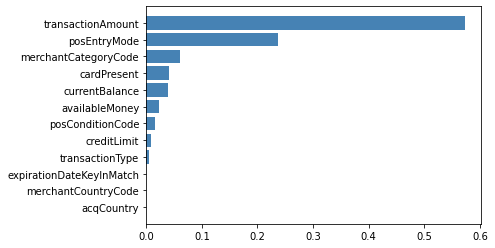

In [ ]:
indices_dt = np.argsort(importances_dt)

fig, ax = plt.subplots()
ax.barh(range(len(importances_dt)), importances_dt[indices_dt], color='steelblue')
ax.set_yticks(range(len(importances_dt)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices_dt])

Dengan menggunakan model Decision Tree, feature yang paling berpengaruh terhadap isFraud adalah transactionAmount


---

### Compare Accuracy Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_acc = accuracy_score(y_test, model1.predict(X_test))
logreg_recall = recall_score(y_test, model1.predict(X_test))
logreg_precision = precision_score(y_test, model1.predict(X_test))
logreg_f1 = f1_score(y_test, model1.predict(X_test))
logreg_auc = aucLR

rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
rf_recall = recall_score(y_test, rf_model.predict(X_test))
rf_precision = precision_score(y_test, rf_model.predict(X_test))
rf_f1 = f1_score(y_test, rf_model.predict(X_test))
rf_auc = aucRF

dt_acc = accuracy_score(y_test, dct_tune.predict(X_test))
dt_recall = recall_score(y_test, dct_tune.predict(X_test))
dt_precision = precision_score(y_test, dct_tune.predict(X_test))
dt_f1 = f1_score(y_test, dct_tune.predict(X_test))
dt_auc = aucDT

In [ ]:
model_performances = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [logreg_acc, rf_acc, dt_acc],
    "Recall": [logreg_recall, rf_recall, dt_recall],
    "Precision": [logreg_precision, rf_precision, dt_precision],
    "F1-Score": [logreg_f1, rf_f1, dt_f1],
    "AUC Score": [logreg_auc, rf_auc, dt_auc]
})

model_performances

,Model,Accuracy,Recall,Precision,F1-Score,AUC Score
0,Logistic Regression,0.630322,0.596840,0.027761,0.053054,0.656533
1,Random Forest,0.674409,0.693905,0.036230,0.068865,0.746516
2,Decision Tree,0.690209,0.624831,0.034514,0.065414,0.706340


Dari perbandingan diatas dapat dilihat model yang bagus untuk memprediksi suatu transaksi fraud atau legitimate adalah Random Forest

# Kesimpulan

Feature yang paling berpengaruh terhadap suatu transaksi fraud atau legitimate berdasarkan model yang dipakai adalah sebagai berikut,
1. Logistic Regression: merchantCategoryCode
2. Random Forest: transactionAmount
3. Decision Tree: transactionAmount

Serta model yang terbaik untuk memprediksi suatu transaksi fraud atau legitimate adalah Random Forest.